In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Unsupervised learning: Hierarchical and density-based clustering algorithms

In a previous notebook, "08 Unsupervised Learning - Clustering.ipynb", we introduced one of the essential and widely used clustering algorithms, K-means. One of the advantages of K-means is that it is extremely easy to implement, and it is also computationally very efficient compared to other clustering algorithms. However, we've seen that one of the weaknesses of K-Means is that it only works well if the data can be grouped into a globular or spherical shape. Also, we have to assign the number of clusters, *k*, *a priori* -- this can be a problem if we have no prior knowledge about how many clusters we expect to find. 

In this notebook, we will take a look at 2 alternative approaches to clustering, hierarchical clustering and density-based clustering. 

# Hierarchical Clustering

One nice feature of hierachical clustering is that we can visualize the results as a dendrogram, a hierachical tree. Using the visualization, we can then decide how "deep" we want to cluster the dataset by setting a "depth" threshold. Or in other words, we don't need to make a decision about the number of clusters upfront.

**Agglomerative and divisive hierarchical clustering**

Furthermore, we can distinguish between 2 main approaches to hierarchical clustering: Divisive clustering and agglomerative clustering. In agglomerative clustering, we start with a single sample from our dataset and iteratively merge it with other samples to form clusters -- we can see it as a bottom-up approach for building the clustering dendrogram.  
In divisive clustering, however, we start with the whole dataset as one cluster, and we iteratively split it into smaller subclusters -- a top-down approach.  

In this notebook, we will use **agglomerative** clustering.

**Single and complete linkage**

Now, the next question is how we measure the similarity between samples. One approach is the familiar Euclidean distance metric that we already used via the K-Means algorithm. As a refresher, the distance between 2 m-dimensional vectors $\mathbf{p}$ and $\mathbf{q}$ can be computed as:

\begin{align} \mathrm{d}(\mathbf{q},\mathbf{p}) & = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_m-p_m)^2} \\[8pt]
& = \sqrt{\sum_{j=1}^m (q_j-p_j)^2}.\end{align}	


However, that's the distance between 2 samples. Now, how do we compute the similarity between subclusters of samples in order to decide which clusters to merge when constructing the dendrogram? I.e., our goal is to iteratively merge the most similar pairs of clusters until only one big cluster remains. There are many different approaches to this, for example single and complete linkage. 

In single linkage, we take the pair of the most similar samples (based on the Euclidean distance, for example) in each cluster, and merge the two clusters which have the most similar 2 members into one new, bigger cluster.

In complete linkage, we compare the pairs of the two most dissimilar members of each cluster with each other, and we merge the 2 clusters where the distance between its 2 most dissimilar members is smallest.

![](figures/clustering-linkage.png)


To see the agglomerative, hierarchical clustering approach in action, let us load the familiar Iris dataset -- pretending we don't know the true class labels and want to find out how many different follow species it consists of:

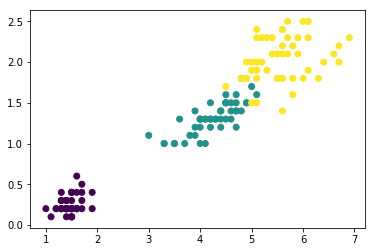

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
n_samples, n_features = X.shape

plt.scatter(X[:, 0], X[:, 1], c=y);

First, we start with some exploratory clustering, visualizing the clustering dendrogram using SciPy's `linkage` and `dendrogram` functions:

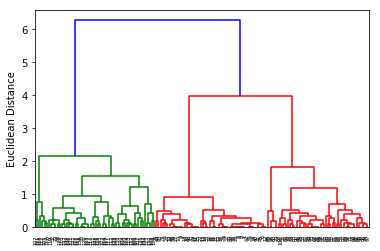

In [3]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

clusters = linkage(X, 
                   metric='euclidean',
                   method='complete')

dendr = dendrogram(clusters)

plt.ylabel('Euclidean Distance');

Next, let's use the `AgglomerativeClustering` estimator from scikit-learn and divide the dataset into 3 clusters. Can you guess which 3 clusters from the dendrogram it will reproduce?

In [4]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')

prediction = ac.fit_predict(X)
print('Cluster labels: %s\n' % prediction)

Cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



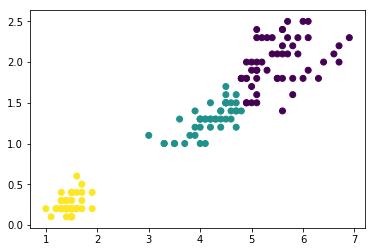

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=prediction);

# Density-based Clustering - DBSCAN

Another useful approach to clustering is *Density-based Spatial Clustering of Applications with Noise* (DBSCAN). In essence, we can think of DBSCAN as an algorithm that divides the dataset into subgroup based on dense regions of point.

In DBSCAN, we distinguish between 3 different "points":

- Core points: A core point is a point that has at least a minimum number of other points (MinPts) in its radius epsilon.
- Border points: A border point is a point that is not a core point, since it doesn't have enough MinPts in its neighborhood, but lies within the radius epsilon of a core point.
- Noise points: All other points that are neither core points nor border points.

![](figures/dbscan.png)

A nice feature about DBSCAN is that we don't have to specify a number of clusters upfront. However, it requires the setting of additional hyperparameters such as the value for MinPts and the radius epsilon.

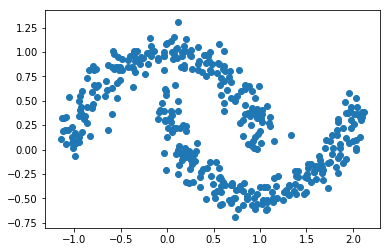

In [15]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400,
                  noise=0.1,
                  random_state=1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Predicted labels:
 [ 0  1  0  0  1  0  1  0  1  0  1  0  1  0  0  0  0  1  1  0  1  0  0  0  1
  1  0  0  0  0  1  1  1  0  1  1  1  1  0  1  0  0  1  1  0  1  0  0  0  0
  1  0  0  1  0  0  0  1  0  0  1  1  0  0  0  0  1  0  0  0  0  1  0  0  1
  0  1  1  1  0  1  1  0 -1  1  1  0  0  0  1  1  0  0  0  1  0  0  0  0  1
  1  0  1  1  1  0  1  0  0  0  1  0  1  0  1  1  0  0  1  0  1  1  0  0  0
  1  1  1  0  0  0  0  0  0  0  0  1  1  1  0  1  1  1  1  1  1  1  1  1  1
  0  1  1  1  0  0  1  1  1  0  1  0  0  1  0  1  1  0  1  0  0  0  0  0  1
  1  0  1  1  1  1  0  1  0  1  1  1  1  0  1  0  0  0  1  0  1  1  0  1  1
  0  1  0  0  0  1  1  1  0  1  0  1  0  0  0  1  0  1  0  1  1  1  1  0  1
  0  0  0  0  0  0  1  0  1  0  1  1 -1  0  0  1  1  1  1  1  1  1  0  1  1
  0  1  1  0  1  0  1  0  0  0  0  0  0  1  0  0  0  1  1  1  1  0 -1  0  1
  1  1  1  1  0  1  0  1  0  1  1  1  1  1  0  1  0  1  0  1  0  0  1  0  1
  0  1  0  1  0  1  0  0  1  0  1  1  0  0  0  1  1  0  0  1  1  0  0

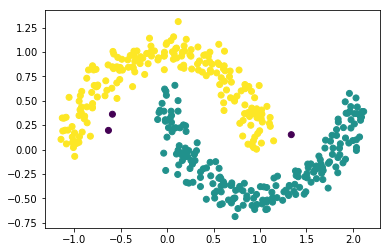

In [19]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,
            min_samples=10,
            metric='euclidean')
prediction = db.fit_predict(X)

print("Predicted labels:\n", prediction)

plt.scatter(X[:, 0], X[:, 1], c=prediction);

# Exercise

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Using the following toy dataset, two concentric circles, experiment with the three different clustering algorithms that we used so far: `KMeans`, `AgglomerativeClustering`, and `DBSCAN`.

Which clustering algorithms reproduces or discovers the hidden structure (pretending we don't know `y`) best?

Can you explain why this particular algorithm is a good choice while the other 2 "fail"?
      </li>
    </ul>
</div>

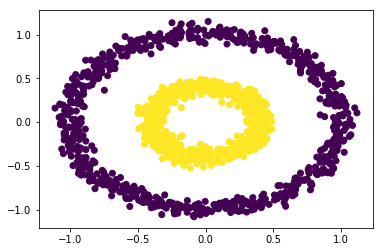

In [20]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1500, 
                    factor=.4
                    , 
                    noise=.05)

plt.scatter(X[:, 0], X[:, 1], c=y);

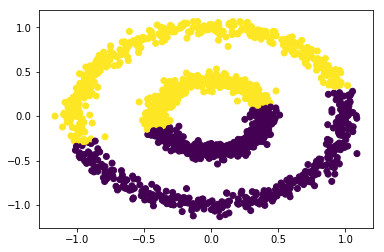

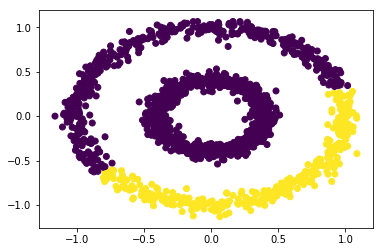

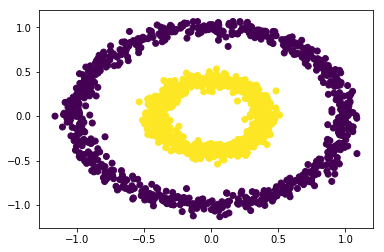

In [27]:
# %load solutions/20_clustering_comparison.py
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

X, y = make_circles(n_samples=1500, 
                    factor=.4, 
                    noise=.05)

km = KMeans(n_clusters=2)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=km.fit_predict(X))

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=ac.fit_predict(X))

db = DBSCAN(eps=0.2)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=db.fit_predict(X));
